In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize images (scale pixel values 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images (28x28 → 784)
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # Output layer
])

C:\Users\Jaya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=128,
    verbose=2
)


Epoch 1/20
422/422 - 5s - 13ms/step - accuracy: 0.8936 - loss: 0.3632 - val_accuracy: 0.9632 - val_loss: 0.1216
Epoch 2/20
422/422 - 3s - 7ms/step - accuracy: 0.9557 - loss: 0.1472 - val_accuracy: 0.9743 - val_loss: 0.0889
Epoch 3/20
422/422 - 3s - 6ms/step - accuracy: 0.9682 - loss: 0.1050 - val_accuracy: 0.9785 - val_loss: 0.0751
Epoch 4/20
422/422 - 3s - 6ms/step - accuracy: 0.9741 - loss: 0.0820 - val_accuracy: 0.9802 - val_loss: 0.0677
Epoch 5/20
422/422 - 3s - 7ms/step - accuracy: 0.9783 - loss: 0.0697 - val_accuracy: 0.9813 - val_loss: 0.0615
Epoch 6/20
422/422 - 3s - 7ms/step - accuracy: 0.9824 - loss: 0.0565 - val_accuracy: 0.9798 - val_loss: 0.0714
Epoch 7/20
422/422 - 3s - 7ms/step - accuracy: 0.9844 - loss: 0.0503 - val_accuracy: 0.9790 - val_loss: 0.0669
Epoch 8/20
422/422 - 3s - 7ms/step - accuracy: 0.9844 - loss: 0.0473 - val_accuracy: 0.9807 - val_loss: 0.0683
Epoch 9/20
422/422 - 3s - 6ms/step - accuracy: 0.9868 - loss: 0.0408 - val_accuracy: 0.9825 - val_loss: 0.0662


In [7]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy, precision, recall
print("Accuracy:", accuracy_score(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9806
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



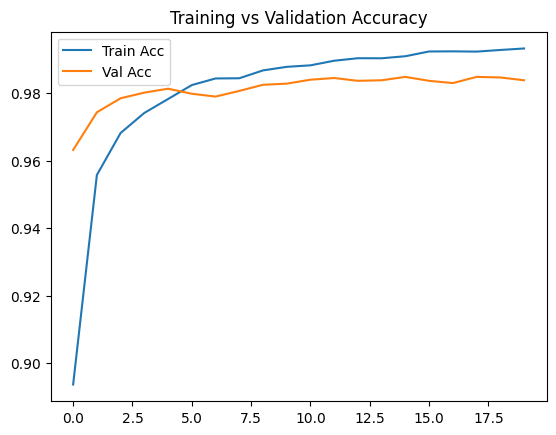

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()